In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
company_data = pd.read_csv("Company_Data.csv")
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Exploratory Data Analysis (EDA)

In [3]:
company_data.shape

(400, 11)

In [4]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
# splitting the target Variable in to 2 parts
def split(num):
    if num < 5:
        return 'Low sale'
    elif num >= 5 and num < 10:
        return 'Average sale'
    else:
        return 'High sale'
company_data.Sales = company_data.Sales.apply(split)

<AxesSubplot:>

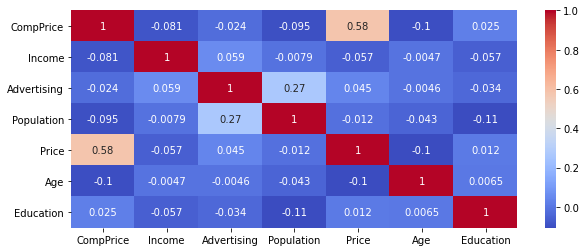

In [7]:
#Correlation heatmap
corr = company_data.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')


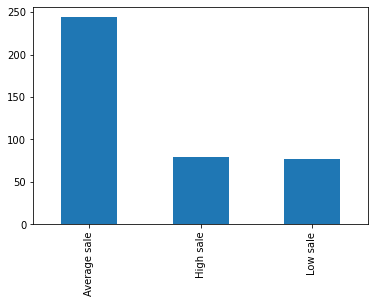

Average sale    244
High sale        79
Low sale         77
Name: Sales, dtype: int64


In [8]:
company_data['Sales'].value_counts(sort=True).plot.bar()
plt.show()
print(company_data['Sales'].value_counts())

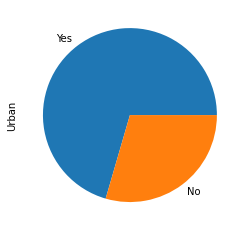

Yes    282
No     118
Name: Urban, dtype: int64


In [9]:
company_data['Urban'].value_counts().plot.pie()
plt.show()
print(company_data['Urban'].value_counts())

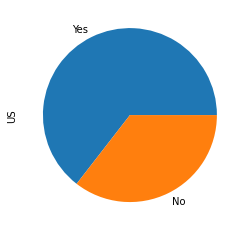

Yes    258
No     142
Name: US, dtype: int64


In [10]:
company_data['US'].value_counts().plot.pie()
plt.show()
print(company_data['US'].value_counts())

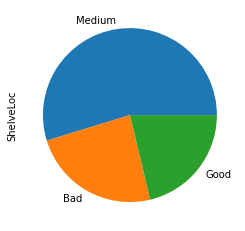

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [11]:
company_data['ShelveLoc'].value_counts(sort=True).plot.pie()
plt.show()
print(company_data['ShelveLoc'].value_counts())

In [12]:
from sklearn.preprocessing import LabelEncoder

label= LabelEncoder()
company_data1 = company_data[['ShelveLoc', 'Urban','US']].apply(label.fit_transform)
company_data1 = company_data1.rename(columns={'ShelveLoc':'ShelveLoc_', 'Urban':'Urban_','US':'US_'})
company_data1.head()

,ShelveLoc_,Urban_,US_
0,0,1,1
1,1,1,1
2,2,1,1
3,2,1,1
4,0,1,0


In [13]:
colnames=list(company_data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [14]:
company_data = pd.concat([company_data,company_data1], axis=1, sort=False)
company_data = company_data.drop(columns={'ShelveLoc','Urban','US'},axis=1)
company_data = company_data[["CompPrice","Income","Advertising","Population","Price","Age","Education","ShelveLoc_","Urban_","US_","Sales"]]

company_data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_,Urban_,US_,Sales
0,138,73,11,276,120,42,17,0,1,1,Average sale
1,111,48,16,260,83,65,10,1,1,1,High sale
2,113,35,10,269,80,59,12,2,1,1,High sale
3,117,100,4,466,97,55,14,2,1,1,Average sale
4,141,64,3,340,128,38,13,0,1,0,Low sale


In [15]:
colnames=list(company_data.columns)
predictors = colnames[:10]
target=colnames[10]
print("predictors: ",predictors)
print("target: ",target)

predictors:  ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_', 'Urban_', 'US_']
target:  Sales


In [16]:
X = company_data[predictors]
Y = company_data[target]

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")
rf.fit(X,Y) # Fitting RandomForestClassifier model from sklearn.ensemble

C:\Users\aaa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\aaa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [18]:
# Attributes that comes along with RandomForest function
rf.estimators_ 
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels 
rf.n_features_  # Number of input features in model 10 here.
rf.n_outputs_ # Number of outputs when fit performed
rf.oob_score_

0.6625

## Actual vs Predicted Values

In [19]:
rf.predict(X)
company_data['rf_pred'] = rf.predict(X)
cols = ['rf_pred','Sales']
company_data[cols].head()

,rf_pred,Sales
0,Average sale,Average sale
1,High sale,High sale
2,High sale,High sale
3,Average sale,Average sale
4,Low sale,Low sale


In [20]:
company_data["Sales"]

0      Average sale
1         High sale
2         High sale
3      Average sale
4          Low sale
           ...     
395       High sale
396    Average sale
397    Average sale
398    Average sale
399    Average sale
Name: Sales, Length: 400, dtype: object

In [21]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

confusion_matrix(company_data["Sales"],company_data['rf_pred']) # Confusion matrix
pd.crosstab(company_data["Sales"],company_data['rf_pred'])

rf_pred,Average sale,High sale,Low sale
Sales,,,
Average sale,244,0,0
High sale,0,79,0
Low sale,3,0,74


In [22]:
classification_report = classification_report(Y,rf.predict(X))
print(classification_report)

              precision    recall  f1-score   support

Average sale       0.99      1.00      0.99       244
   High sale       1.00      1.00      1.00        79
    Low sale       1.00      0.96      0.98        77

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



## Accuracy

In [23]:
print("Accuracy",metrics.accuracy_score(Y,rf.predict(X)))

Accuracy 0.9925
